In [111]:
import logging, sys
import seaborn as sns
import pandas as pd
import numpy as np
import sqlite3
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Load tweets from Database

In [112]:
try:
    connection = sqlite3.connect("../data/project.sqlite")
    tweets = pd.read_sql_query(f"SELECT * FROM tweets", connection)
except sqlite3.Error as e:
    logging.error(msg=f"Error while creating SQLite DB: {e}")
    sys.exit(1)
finally:
    connection.close()

Data Analysis

In [116]:
tweets.tail()

,target,text,processed_text
1599994,1,Just woke up. Having no school is the best fee...,woke school best feeling ever
1599995,1,TheWDB.com - Very cool to hear old Walt interv...,thewdb com cool hear old walt interview
1599996,1,Are you ready for your MoJo Makeover? Ask me f...,ready mojo makeover ask detail
1599997,1,Happy 38th Birthday to my boo of alll time!!! ...,happy th birthday boo alll time tupac amaru sh...
1599998,1,happy #charitytuesday @theNSPCC @SparksCharity...,happy charitytuesday


<Axes: xlabel='target', ylabel='count'>

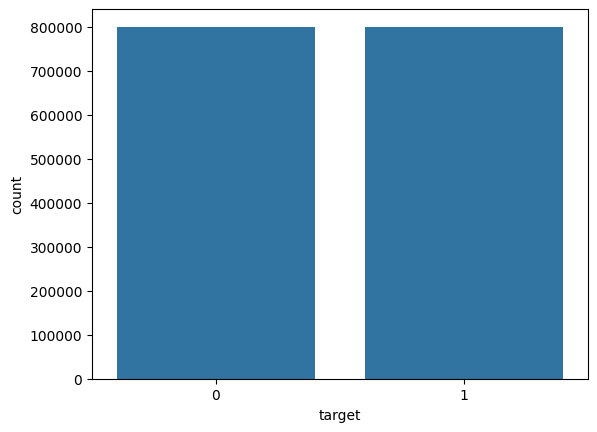

In [114]:
sns.countplot(x="target", data=tweets)

In [97]:
positive_tweet = tweets[tweets.target == 1]["processed_text"]
negative_tweet = tweets[tweets.target == 0]["processed_text"]
tweets[tweets.target == 1]["processed_text"].iloc[1]

'im meeting one besties tonight cant wait girl talk'

(-0.5, 399.5, 199.5, -0.5)

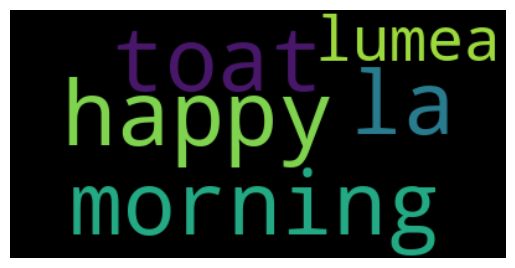

In [115]:
wordcloud = WordCloud().generate(positive_tweet.iloc[500])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

Data Preprocessing

In [99]:
tweets.iloc[0]["processed_text"]

'upset update facebook texting might cry result school today also blah'

In [100]:
X = tweets["processed_text"].values
Y = tweets["target"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

Convert text data into numerical data

In [101]:
vectorizer = TfidfVectorizer()
print(X.shape, X_train.shape, X_test.shape)

(1599999,) (1279999,) (320000,)


In [102]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

Logistic Regresion exploration

In [109]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','sag','saga'],
    'max_iter' : [1000, 2500, 5000]
    }
]

In [110]:
logModel = LogisticRegression()
clf = GridSearchCV(logModel, param_grid = param_grid, cv=3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train,Y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


/Users/pranto/Documents/Codes/project-made/made-template/venv/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/pranto/Documents/Codes/project-made/made-template/venv/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/pranto/Documents/Codes/project-made/made-template/venv/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/pranto/Documents/Codes/project-made/made-template/venv/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/pranto/Documents/Codes/project-made/made-template/venv/lib/python3.11/site-packages/scipy

KeyboardInterrupt: 

In [ ]:
model = LogisticRegression(max_iter=1000)
print(X.shape, X_train.shape, X_test.shape)

(1599999,) (1279999, 222224) (320000, 222224)


In [ ]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

Model Evaluation

In [ ]:
X_train_prediction = model.predict(X_train)
training_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Training accuracy:", training_accuracy)

Training accuracy: 0.7984373425291739


In [ ]:
X_test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.77835625


In [ ]:
data_point = ["Bangladesh lost the world cup"]
data_point_vectorized = vectorizer.transform(data_point)
prediction = model.predict(data_point_vectorized)
print("Prediction: ", prediction, "Data: ", data_point)

Prediction:  [0] Data:  ['Bangladesh lost the world cup']
